## Node2vec

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

import pickle

In [7]:
from sklearn.decomposition import PCA

In [8]:
import sys

sys.path.append("./node2vec/src/")

In [9]:
import utils.utils as u

In [10]:
import main as n2v
import node2vec as n2v_src
import networkx as nx

In [11]:
from importlib import reload
n2v = reload(n2v)
n2v_src = reload(n2v_src)

In [9]:
gr0 = np.load("../data/graphs/SlO_22.npy")#[:34,:34]
nd = pickle.load(open("../data/dicts/SlO_counts_22", 'rb'))
sp_to_n = pickle.load(open("../data/dicts/SlO_sp_to_n_22", 'rb'))

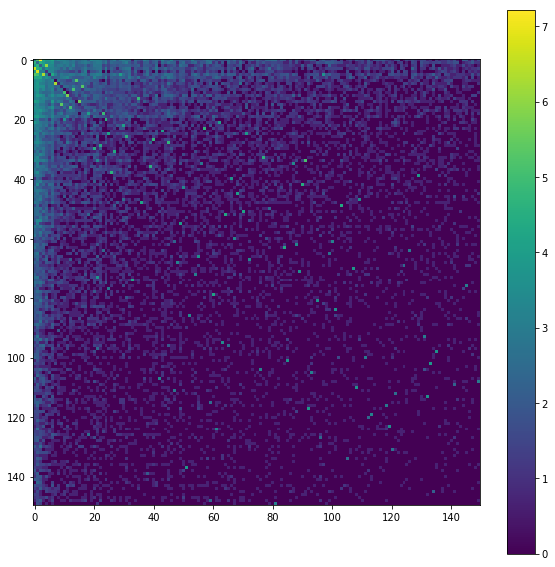

In [10]:
u.plot_gr(gr0[:150, :150], log = 1)

In [11]:
good_keys = []
for k in nd.keys():
    if nd[k] > 5:
        good_keys.append(k)

In [12]:
mask = np.zeros(gr0.shape[0]).astype(bool)
for k in good_keys:
    mask[sp_to_n[k]] = True

In [13]:
gr = gr0[mask][:, mask]

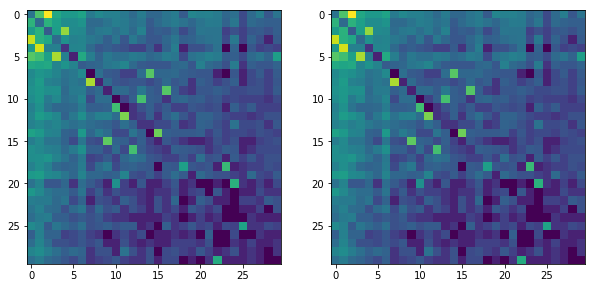

In [15]:
u.plot_grs(gr0[:30, :30], gr[:30, :30], log=1)

In [16]:
gr[(gr.sum(1) == 0)] = 1

In [44]:
gr.shape

(746, 746)

In [45]:
np.save("../data/graphs/SlO_22_cut_at_10", gr)

## ES 3

In [12]:
def random_walks(gr, walks_n, max_len):
    sums = gr.sum(1)
    mask = sums != 0
    gr_n = gr / sums.reshape(-1, 1)
      
    walks = []
    
    for i in range(walks_n * gr.shape[0]):
        #curr = np.random.randint(0, gr_n.shape[0])
        curr = i % gr.shape[0]
        walk = []
        stop = False
        while not stop:
            walk.append(curr)
            if gr[curr].sum() == 0 or len(walk) == max_len:
                stop = True
            else:
                curr = np.random.choice(np.arange(gr.shape[0]), 1, p = gr_n[curr])[0]
        
        walks.append(walk)
    
    return walks

In [13]:
def gr_to_nxGr(graph):
    nxG = nx.DiGraph()
    for i in range(graph.shape[0]):
        for j in range(graph.shape[1]):
            nxG.add_edge(i, j, weight = graph[i,j])
    return nxG

In [82]:
def gr_to_emb(graph, walks_n, l, emb_size = 20):
    spacers_num = graph.shape[0]
    
#     print("ngx")
#     nx_gr = gr_to_nxGr(graph)
#     G = n2v_src.Graph(nx_gr, 1, 0.5, 0.5)
#     G.preprocess_transition_probs()
#     print('walks')
#     walks = G.simulate_walks(walks_n, l)

    walks = random_walks(graph, walks_n, l)
    print('train')
    model = n2v.learn_embeddings(walks, emb_size, 5, 4, 200)
    
    print("PCA")
    E = np.zeros((spacers_num, emb_size))
    for i in range(spacers_num):
        E[i] = model.wv.word_vec(str(i))
    pca = PCA(n_components=emb_size)
    
    return pca.fit_transform(E), model, walks

In [39]:
gr = np.load("../data/graphs/ES3_22.npy")[:35, :35]

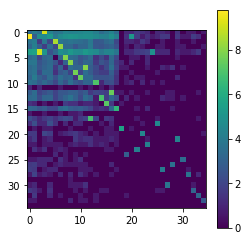

In [40]:
u.plot_gr(gr, log = 1, s = 4)

In [83]:
emb, model, walks = gr_to_emb(gr, 100, 10)

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


train
PCA


In [76]:
log_emb, log_model, walks = gr_to_emb(np.log(gr + 1), 100, 10)

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


train
PCA


In [56]:
population_as_list

[[1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 [4, 2, 5, 7, 11],
 [4, 24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 [1, 20, 22, 23, 21, 29]]

In [57]:
walks

[[0, 3, 6, 8, 4, 8, 9, 6, 8, 9, 10, 13, 7, 11, 2, 5, 7, 11, 6, 8],
 [1, 0, 3, 6, 8, 9, 6, 8, 9, 10, 13, 14, 15, 0, 3, 6, 8, 9, 10, 13],
 [2, 5, 7, 11, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16, 0, 5, 7, 11, 2, 5],
 [3, 4, 13, 14, 15, 17, 12, 16, 9, 10, 13, 14, 15, 11, 6, 8, 7, 11, 10, 10],
 [4, 16, 10, 13, 7, 11, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16, 6, 8, 9, 10],
 [5, 7, 11, 0, 3, 6, 4, 13, 14, 15, 17, 12, 1, 6, 9, 10, 13, 14, 15, 16],
 [6, 8, 9, 10, 13, 14, 15, 17, 12, 9, 10, 13, 14, 15, 0, 3, 6, 8, 9, 10],
 [7, 11, 10, 13, 14, 15, 12, 16, 9, 10, 13, 1, 0, 3, 6, 8, 8, 9, 10, 13],
 [8, 9, 10, 13, 14, 15, 7, 11, 16, 8, 9, 10, 13, 14, 15, 16, 3, 6, 8, 9],
 [9, 10, 13, 14, 12, 16, 6, 8, 9, 2, 5, 7, 11, 10, 13, 14, 15, 17, 12, 16],
 [10, 13, 14, 15, 17, 12, 16, 8, 9, 10, 13, 14, 15, 17, 12, 11, 12, 16, 3, 6],
 [11, 16, 6, 8, 9, 10, 13, 14, 15, 2, 5, 7, 11, 16, 9, 10, 13, 14, 15, 0],
 [12, 16, 6, 4, 2, 5, 7, 26, 16, 10, 13, 14, 15, 17, 12, 16, 9, 10, 13, 14],
 [13, 9, 10, 13, 17, 12, 16, 8, 1, 0,

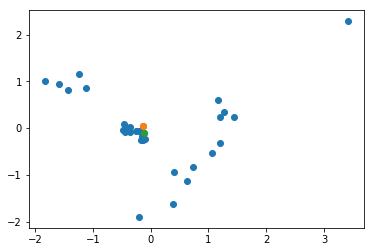

In [58]:
plt.scatter(emb[:,0], emb[:, 1])
plt.scatter(emb[1,0], emb[1, 1])
plt.scatter(emb[4,0], emb[4, 1])

In [48]:
population_as_list = [[1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16] for i in range(1)] + \
               [[4, 2, 5, 7, 11] for i in range(1)] + \
               [[4, 24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34]] + \
               [[1, 20, 22, 23, 21, 29]]

In [49]:
def plot_embs_space(emb, p_as_list, special_cases):
    plt.scatter(emb[:,0], emb[:, 1])

    plt.scatter(emb[p_as_list[0],0], emb[p_as_list[0], 1], c = 'r')
    plt.scatter(emb[1,0], emb[1, 1], marker = 'x', s= 200, c = 'r')


    plt.scatter(emb[p_as_list[3],0], emb[p_as_list[3], 1], c = 'g')



    plt.scatter(emb[p_as_list[1],0], emb[p_as_list[1], 1], c = 'y')
    plt.scatter(emb[4,0], emb[4, 1], marker = 'x', s= 200, c = 'y')


    plt.scatter(emb[p_as_list[2],0], emb[p_as_list[2], 1], c = 'black')

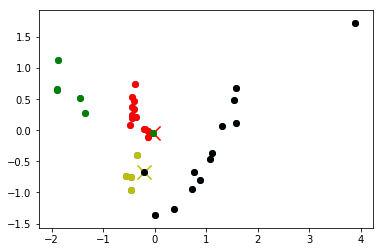

In [84]:
plot_embs_space(emb, population_as_list, None)

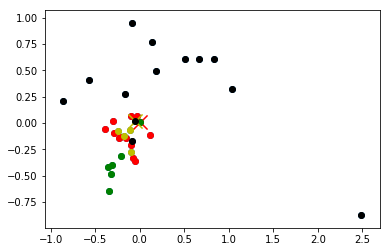

In [78]:
plot_embs_space(log_emb, population_as_list, None)

In [85]:
model.most_similar_cosmul(positive='1')

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  """Entry point for launching an IPython kernel.


[('8', 0.8016384840011597),
 ('3', 0.7923552393913269),
 ('30', 0.741686224937439),
 ('6', 0.7414104342460632),
 ('22', 0.7187730073928833),
 ('9', 0.716191828250885),
 ('0', 0.6946747899055481),
 ('19', 0.6911914944648743),
 ('4', 0.678566038608551),
 ('25', 0.6657825112342834)]

## Model Edge pred

In [89]:
import h_module.hamiltonian_path as hp

In [91]:
c = {}
hp.next_edge(gr,c)

10

In [94]:
def get_weights(gr,chain):
    w = []
    for x, y in zip(chain, chain[1:]):
        w.append(gr[x][y])
    return w

In [108]:
def get_positive_edges(chain, weights, trsh):
    good_edges = []
    chains = []
    
    curr_chain = []
    for x,y,w in zip(chain, chain[1:], weights):
        if w >= trsh:
            good_edges.append((x, y))
            if len(curr_chain) == 0:
                curr_chain.append(x)
            curr_chain.append(y)
        else:
            chains.append(curr_chain)
            curr_chain = []
    if not curr_chain in chains:
        chains.append(curr_chain)
        
    return good_edges, chains

In [109]:
c[0]

[4, 2, 5, 7, 11, 24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34, 20, 22, 23, 21, 29, 1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16]

In [110]:
w = get_weights(gr, c[0].chain)

In [113]:
positive_edges, positive_chains = get_positive_edges(c[0].chain, w, 5)

In [117]:
def generate_negative_edge(positive_edges, positive_chains):
    edges = []
    
#     for edge in positive_edges:
#         edges.append(edge[::-1])
        
    for c in positive_chains:
        for i, v in enumerate(c):
            for j in range(0, i):
                edges.append((v, c[j]))

    return edges

In [120]:
negative_edges = generate_negative_edge(positive_edges, positive_chains)

In [122]:
emb.shape

(35, 20)

In [125]:
def generate_dataset(emb, positive_edges, negative_edges):
    data = np.zeros((len(positive_edges) + len(negative_edges), emb.shape[1] * 2))
    y = np.zeros(data.shape[0])
    
    for i,edge in enumerate(positive_edges):
        data[i] = np.hstack((emb[edge[0]], emb[edge[1]]))
        y[i] = 1
    
    shift = len(positive_edges)
    for i,edge in enumerate(negative_edges):
        data[i + shift] = np.hstack((emb[edge[0]], emb[edge[1]]))
        y[i + shift] = 0
    
    return data, y
    

In [157]:
X, y = generate_dataset(emb[:, :4], positive_edges, negative_edges)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [170]:
lr = LogisticRegression()
rf = RandomForestClassifier(1000, class_weight='balanced')

In [133]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [171]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [139]:
lr.predict_proba(X)[:, 1] > 0.3

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [163]:
def range_graph(gr, emb, model):
    scores = np.zeros_like(gr)
    
    for i in range(gr.shape[0]):
        for j in range(gr.shape[1]):
            x = np.hstack((emb[i], emb[j]))
            scores[i,j] = model.predict_proba(x.reshape(1, -1))[0][1]
    return scores

In [172]:
gr_scores_4 = range_graph(gr, emb[:,:4], rf)

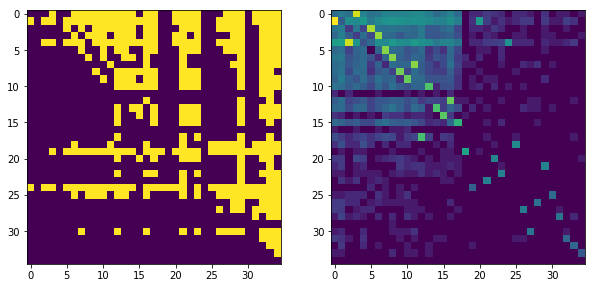

In [177]:
u.plot_grs(gr_scores_4 > 0.5, np.log(gr + 1))

In [169]:
gr_scores_4

array([16, 16, 29, 29, 29, 29, 34, 33, 29, 29, 29, 34, 16, 29, 29, 29, 34,
       29, 31, 28, 29, 29, 29, 29, 26, 32, 33, 34, 34, 34, 33, 32, 34, 34,
       29])

# Clustering

In [126]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture

In [148]:
km = KMeans(4)

In [149]:
preds = km.fit_predict(emb[:,:])

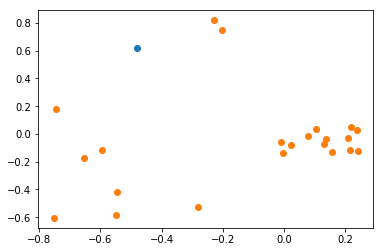

In [150]:
plt.scatter(log_emb[preds == 1,0], log_emb[preds == 1, 1])
plt.scatter(log_emb[preds == 0,0], log_emb[preds == 0, 1])

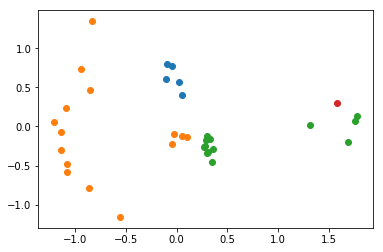

In [165]:
plt.scatter(emb[preds == 1,0], emb[preds == 1, 1])
plt.scatter(emb[preds == 0,0], emb[preds == 0, 1])
plt.scatter(emb[preds == 2,0], emb[preds == 2, 1])
plt.scatter(emb[preds == 3,0], emb[preds == 3, 1])

In [163]:
gm = GaussianMixture(4)

In [164]:
gm.fit(emb[:])
preds = gm.predict(emb[:])

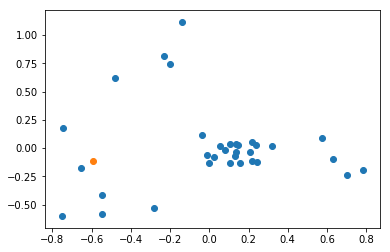

In [136]:
plt.scatter(log_emb[preds == 1,0], log_emb[preds == 1, 1])
plt.scatter(log_emb[preds == 0,0], log_emb[preds == 0, 1])

In [53]:
walks

[[0, 3, 6, 15, 8, 9, 10, 13, 14, 15],
 [1, 0, 3, 6, 8, 9, 10, 13, 4, 2],
 [2, 5, 7, 10, 9, 10, 13, 14, 15, 17],
 [3, 6, 8, 9, 10, 13, 14, 15, 17, 12],
 [4, 0, 3, 6, 8, 9, 7, 11, 16, 8],
 [5, 7, 11, 14, 15, 17, 12, 16, 10, 13],
 [6, 1, 0, 3, 6, 8, 9, 10, 11, 2],
 [7, 1, 0, 3, 6, 8, 9, 10, 13, 14],
 [8, 9, 6, 8, 9, 10, 16, 8, 9, 10],
 [9, 10, 13, 14, 15, 17, 21, 29, 8, 9],
 [10, 13, 14, 15, 3, 6, 8, 9, 6, 8],
 [11, 12, 16, 8, 9, 10, 4, 2, 12, 16],
 [12, 7, 11, 12, 16, 3, 14, 15, 7, 11],
 [13, 14, 15, 17, 12, 16, 6, 8, 9, 3],
 [14, 15, 17, 25, 30, 0, 3, 6, 8, 15],
 [15, 17, 12, 16, 3, 6, 1, 0, 3, 6],
 [16, 10, 13, 14, 15, 17, 12, 16, 10, 8],
 [17, 12, 16, 9, 10, 13, 1, 0, 3, 6],
 [18, 25, 1, 0, 3, 6, 8, 9, 17, 12],
 [19, 18, 25, 7, 11, 2, 5, 7, 11, 0],
 [20, 3, 6, 8, 10, 10, 13, 14, 15, 17],
 [21, 29, 8, 0, 3, 6, 8, 9, 12, 16],
 [22, 23, 21, 29, 8, 9, 10, 13, 14, 15],
 [23, 21, 29, 8, 9, 7, 11, 14, 15, 3],
 [24, 19, 18, 25, 0, 3, 6, 8, 9, 10],
 [25, 30, 27, 26, 16, 9, 12, 16, 0, 3],
 [26,

In [66]:
population_as_list

[[1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 [4, 2, 5, 7, 11],
 [4, 24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 [1, 20, 22, 23, 21, 29]]

In [88]:
model.most_similar(positive='1')

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('8', 0.603278398513794),
 ('3', 0.5847119688987732),
 ('30', 0.4833739399909973),
 ('6', 0.4828222692012787),
 ('22', 0.437547504901886),
 ('9', 0.4323849678039551),
 ('0', 0.3893508315086365),
 ('19', 0.3823843002319336),
 ('4', 0.3571333885192871),
 ('25', 0.3315662741661072)]

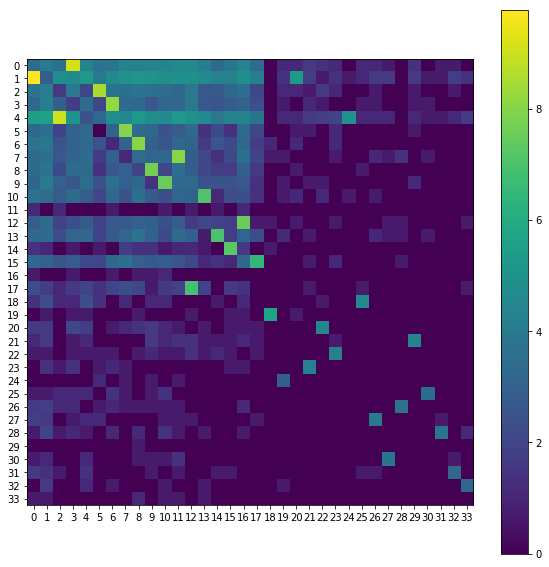

In [143]:
u.plot_gr(gr, log =1, all_ticks=1)

In [117]:
walks

[[17, 12, 16, 9, 10, 1, 0, 4, 2, 5, 0, 3, 6],
 [55],
 [58],
 [19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 [6, 8, 8, 9, 3, 6, 8, 9, 10, 13, 14, 15, 17],
 [43],
 [4, 2, 5, 12, 16, 10, 8, 9, 10, 13, 14, 15, 17],
 [50],
 [65],
 [51],
 [62],
 [0, 9, 10, 1, 0, 3, 6, 8, 9, 10, 6, 8, 7],
 [9, 10, 13, 4, 2, 5, 7, 11, 2, 5, 7, 11, 16],
 [14, 15, 17, 12, 16, 6, 8, 9, 10, 13, 14, 15, 17],
 [15, 17, 12, 16, 6, 12, 16, 0, 3, 13, 14, 15, 6],
 [2, 5, 7, 11, 6, 8, 9, 10, 13, 14, 15, 17, 12],
 [61],
 [31, 0, 3, 6, 8, 9, 10, 13, 1, 0, 10, 13, 14],
 [66],
 [67],
 [8, 9, 10, 13, 4, 2, 5, 7, 11, 2, 5, 7, 11],
 [39],
 [71],
 [41],
 [20, 10, 13, 14, 15, 17, 4, 2, 5, 7, 11, 2, 5],
 [49],
 [37],
 [5, 7, 11, 2, 5, 7, 11, 16, 8, 9, 10, 13, 9],
 [40],
 [63],
 [13, 14, 15, 0, 3, 6, 8, 9, 10, 11, 16, 0, 3],
 [1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 [22, 23, 21, 16, 9, 10, 3, 6, 8, 9, 10, 13, 14],
 [64],
 [38],
 [32, 33, 34],
 [42],
 [57],
 [27, 26, 28, 31, 1, 0, 3, 6, 8, 9, 10, 13, 14],
 [60],
 [54],
 [69]